# 3. 머신러닝 프로젝트 진행과정

---

## 학습 목표
- 머신러닝 프로젝트 수행하기 위해서 그 진행 과정을 학습합니다.
- 머신러닝 모델 선택에 앞서 데이터를 분석하고 정제하는 방법을 학습합니다.

---

## 목차

### 2. 탐색적 데이터 분석
1. 데이터 확인
2. 데이터 정제
3. 특성 엔지니어링
4. 상관 관계 분석


---

### 2-3. 특성 엔지니어링

특성 엔지니어링(feature engineering)이란 새로운 관측치나 변수를 추가하지 않고도 기존의 데이터를 보다 유용하게 만드는 방법을 의미합니다.

특성 엔지니어링은 아래와 같은 방식이 존재합니다.

- 스케일링(Scaling)
- 바이닝(Binning)
- 더미(Dummy)

특성 엔지니어링을 수행하기 앞서, `train.csv` 를 불러와 데이터 정제를 수행하겠습니다.

`cabin` 변수는 전체 삭제하고, `age` 데이터는 부분 삭제를 수행합니다. 

In [1]:
import pandas as pd

titanic = pd.read_csv('./train.csv')

titanic.drop(['Cabin'], axis='columns', inplace=True)

titanic.dropna(inplace=True)

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### 스케일링(Scaling)

데이터의 단위를 변경하고 싶거나, 데이터의 분포가 편향되어 있을 경우,  데이터에 log 함수를 적용하거나 square root 등을 사용하여
데이터 분포를 변환합니다.

`Fare` 데이터를 log 값으로 스케일링 해봅시다.

In [2]:
import numpy as np

scale_titanic = titanic

scale_titanic = scale_titanic[scale_titanic['Fare'] > 0]

scale_titanic.loc[:,('Fare')] = np.log(scale_titanic['Fare'])
scale_titanic['Fare']

C:\python\envs\cpu_env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
885    3.371597
886    2.564949
887    3.401197
889    3.401197
890    2.047693
Name: Fare, Length: 705, dtype: float64

원래 `Fare` 데이터 분포를 histogram으로 출력하면 다음과 같습니다. 

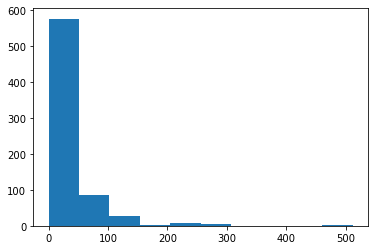

In [3]:
from matplotlib import pyplot as plt

plt.hist(titanic['Fare'])
plt.show()

log 스케일로 스케일링한 분포를 출력하면 다음과 같습니다.

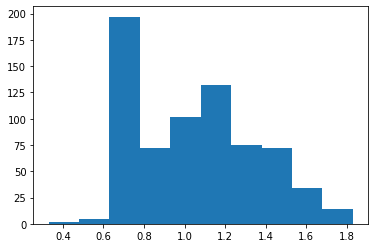

In [19]:
plt.hist(scale_titanic['Fare'])
plt.show()

#### 바이닝(Binning)

범주형 데이터가 필요한 모델인 경우, 연속형 데이터를 범주형 데이터로 변환합니다.

`Age` 데이터를 범주형 데이터로 변환해 보겠습니다.

- 변환 규칙: 20세까지는 0, 20세~ 40세까지는 1, 40세~ 60세까지는 2, 60세 이상은 3

In [22]:
titanic.loc[titanic['Age'] <= 20,'Age'] = 0
titanic.loc[ (titanic['Age'] > 20) & (titanic['Age'] <= 40),'Age'] = 1
titanic.loc[ (titanic['Age'] > 40) & (titanic['Age'] <= 60),'Age'] = 2
titanic.loc[titanic['Age'] > 60,'Age'] = 3

In [23]:
titanic['Age']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
885    1.0
886    1.0
887    0.0
889    1.0
890    1.0
Name: Age, Length: 712, dtype: float64

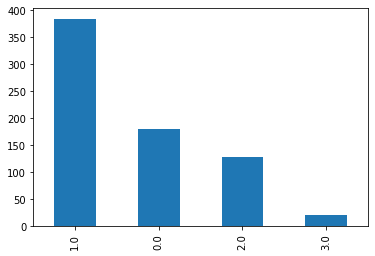

In [24]:
titanic['Age'].value_counts().plot(kind='bar')

#### 더미(Dummy)

연속형 데이터가 필요한 모델인 경우, 범주형 데이터를 연속형 데이터로 변환합니다.

`Sex` 데이터의 `male`을 0으로 `female`을 1로 변환해봅시다.

In [25]:
titanic.loc[titanic['Sex'] == 'male','Sex'] = 0
titanic.loc[titanic['Sex'] == 'female','Sex'] = 1

In [26]:
titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
885    1
886    0
887    1
889    0
890    0
Name: Sex, Length: 712, dtype: int64

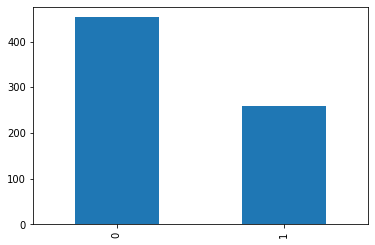

In [27]:
titanic['Sex'].value_counts().plot(kind='bar')

---